## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.232800  0.964202 -0.161645  1.632386  0.673889  1.209676
1  1.498026 -0.120242 -1.647956 -0.964873  1.640213  1.190661
2  0.535992 -0.055917  0.960333  1.682355 -1.279810  1.194966
3  0.910744 -1.449790 -0.004053 -1.299078 -1.172900 -2.033603
4 -1.616692  1.075092  0.908208 -0.047309 -0.684250 -0.822837


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0180589	total: 46.8ms	remaining: 46.7s
1:	learn: 1.0075349	total: 47.3ms	remaining: 23.6s
2:	learn: 0.9950771	total: 47.7ms	remaining: 15.9s
3:	learn: 0.9819917	total: 48.2ms	remaining: 12s
4:	learn: 0.9696867	total: 48.5ms	remaining: 9.66s
5:	learn: 0.9584678	total: 48.9ms	remaining: 8.1s
6:	learn: 0.9464864	total: 49.3ms	remaining: 6.99s
7:	learn: 0.9364366	total: 49.6ms	remaining: 6.16s
8:	learn: 0.9260338	total: 50ms	remaining: 5.51s
9:	learn: 0.9160818	total: 50.4ms	remaining: 4.99s
10:	learn: 0.9061734	total: 50.9ms	remaining: 4.57s
11:	learn: 0.8947606	total: 51.3ms	remaining: 4.22s
12:	learn: 0.8818375	total: 51.6ms	remaining: 3.92s
13:	learn: 0.8714390	total: 52.1ms	remaining: 3.67s
14:	learn: 0.8638729	total: 52.5ms	remaining: 3.45s
15:	learn: 0.8532467	total: 52.9ms	remaining: 3.25s
16:	learn: 0.8429192	total: 53.4ms	remaining: 3.09s
17:	learn: 0.8340648	total: 53.8ms	remaining: 2.94s
18:	learn: 0.8262139	total: 54.2ms	remaining: 2.8

169:	learn: 0.2097524	total: 111ms	remaining: 540ms
170:	learn: 0.2082141	total: 111ms	remaining: 538ms
171:	learn: 0.2063889	total: 111ms	remaining: 536ms
172:	learn: 0.2048385	total: 112ms	remaining: 535ms
173:	learn: 0.2034050	total: 112ms	remaining: 533ms
174:	learn: 0.2020783	total: 113ms	remaining: 531ms
175:	learn: 0.2005222	total: 113ms	remaining: 529ms
176:	learn: 0.1990983	total: 113ms	remaining: 527ms
177:	learn: 0.1977824	total: 114ms	remaining: 525ms
178:	learn: 0.1960833	total: 114ms	remaining: 523ms
179:	learn: 0.1945995	total: 114ms	remaining: 521ms
180:	learn: 0.1930066	total: 115ms	remaining: 519ms
181:	learn: 0.1916746	total: 115ms	remaining: 517ms
182:	learn: 0.1903510	total: 115ms	remaining: 515ms
183:	learn: 0.1887678	total: 116ms	remaining: 513ms
184:	learn: 0.1871997	total: 116ms	remaining: 511ms
185:	learn: 0.1859961	total: 116ms	remaining: 510ms
186:	learn: 0.1845391	total: 117ms	remaining: 508ms
187:	learn: 0.1833230	total: 117ms	remaining: 506ms
188:	learn: 

438:	learn: 0.0454687	total: 211ms	remaining: 269ms
439:	learn: 0.0452865	total: 211ms	remaining: 269ms
440:	learn: 0.0449234	total: 212ms	remaining: 268ms
441:	learn: 0.0446834	total: 212ms	remaining: 267ms
442:	learn: 0.0445082	total: 212ms	remaining: 267ms
443:	learn: 0.0444663	total: 213ms	remaining: 266ms
444:	learn: 0.0441791	total: 213ms	remaining: 266ms
445:	learn: 0.0439100	total: 213ms	remaining: 265ms
446:	learn: 0.0437085	total: 214ms	remaining: 264ms
447:	learn: 0.0436682	total: 214ms	remaining: 264ms
448:	learn: 0.0433913	total: 214ms	remaining: 263ms
449:	learn: 0.0430671	total: 215ms	remaining: 262ms
450:	learn: 0.0430279	total: 215ms	remaining: 262ms
451:	learn: 0.0427540	total: 216ms	remaining: 261ms
452:	learn: 0.0427157	total: 216ms	remaining: 261ms
453:	learn: 0.0424009	total: 216ms	remaining: 260ms
454:	learn: 0.0421396	total: 217ms	remaining: 259ms
455:	learn: 0.0418350	total: 217ms	remaining: 259ms
456:	learn: 0.0417982	total: 217ms	remaining: 258ms
457:	learn: 

722:	learn: 0.0112296	total: 313ms	remaining: 120ms
723:	learn: 0.0111711	total: 313ms	remaining: 119ms
724:	learn: 0.0111128	total: 314ms	remaining: 119ms
725:	learn: 0.0110606	total: 314ms	remaining: 119ms
726:	learn: 0.0110208	total: 315ms	remaining: 118ms
727:	learn: 0.0109999	total: 315ms	remaining: 118ms
728:	learn: 0.0109466	total: 315ms	remaining: 117ms
729:	learn: 0.0109007	total: 316ms	remaining: 117ms
730:	learn: 0.0108448	total: 316ms	remaining: 116ms
731:	learn: 0.0107930	total: 317ms	remaining: 116ms
732:	learn: 0.0107322	total: 317ms	remaining: 115ms
733:	learn: 0.0106947	total: 317ms	remaining: 115ms
734:	learn: 0.0106517	total: 318ms	remaining: 115ms
735:	learn: 0.0106078	total: 318ms	remaining: 114ms
736:	learn: 0.0105716	total: 319ms	remaining: 114ms
737:	learn: 0.0105141	total: 319ms	remaining: 113ms
738:	learn: 0.0104720	total: 319ms	remaining: 113ms
739:	learn: 0.0104371	total: 320ms	remaining: 112ms
740:	learn: 0.0103956	total: 320ms	remaining: 112ms
741:	learn: 

977:	learn: 0.0041844	total: 410ms	remaining: 9.22ms
978:	learn: 0.0041713	total: 410ms	remaining: 8.8ms
979:	learn: 0.0041391	total: 411ms	remaining: 8.38ms
980:	learn: 0.0041264	total: 411ms	remaining: 7.96ms
981:	learn: 0.0040984	total: 412ms	remaining: 7.54ms
982:	learn: 0.0040774	total: 412ms	remaining: 7.13ms
983:	learn: 0.0040503	total: 412ms	remaining: 6.71ms
984:	learn: 0.0040345	total: 413ms	remaining: 6.29ms
985:	learn: 0.0040199	total: 413ms	remaining: 5.87ms
986:	learn: 0.0040078	total: 414ms	remaining: 5.45ms
987:	learn: 0.0039898	total: 414ms	remaining: 5.03ms
988:	learn: 0.0039667	total: 414ms	remaining: 4.61ms
989:	learn: 0.0039411	total: 415ms	remaining: 4.19ms
990:	learn: 0.0039236	total: 415ms	remaining: 3.77ms
991:	learn: 0.0039097	total: 416ms	remaining: 3.35ms
992:	learn: 0.0038979	total: 416ms	remaining: 2.93ms
993:	learn: 0.0038843	total: 417ms	remaining: 2.51ms
994:	learn: 0.0038547	total: 417ms	remaining: 2.1ms
995:	learn: 0.0038431	total: 417ms	remaining: 1.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

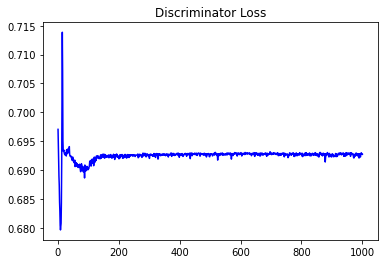

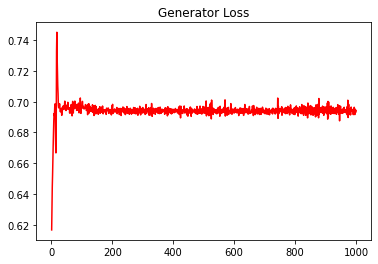

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.056175163981246175


#### Sanity Checks 

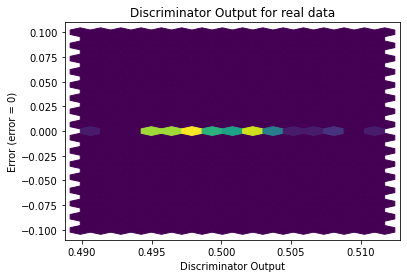

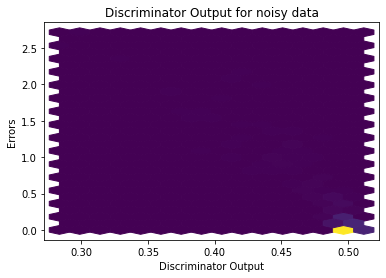

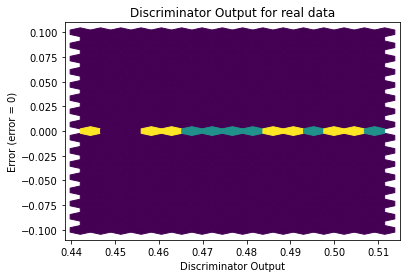

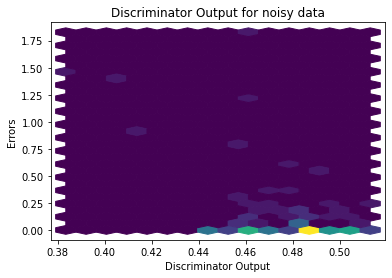

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


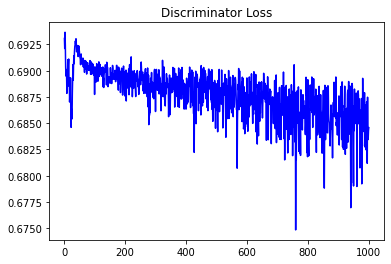

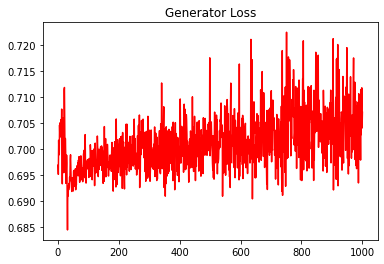

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.049937557255360185


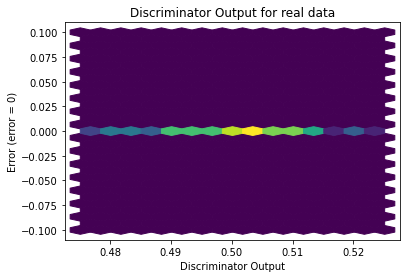

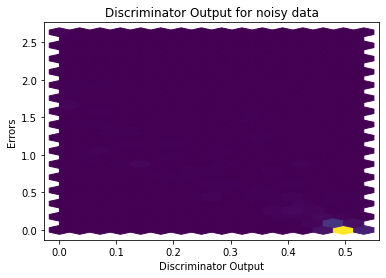

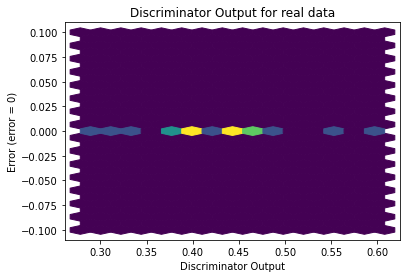

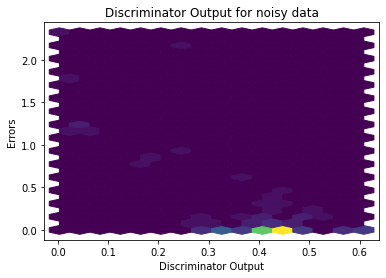

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1405]], device='cuda:0', requires_grad=True)
